In [58]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

In [59]:
class PerceptronSimple:
    
    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs
    

    def reporte(self):
        return self.weights, self.bias
    
        # Función de activación: Heaviside
    def activation(self, z):
        return np.heaviside(z, 0)
    
    def fit(self, X, y):
        n_features = X.shape[1]
        
        # Inicialización de parámetros (w y b)
        self.weights = np.zeros((n_features))
        self.bias = 0
        
        # Iterar n épocas
        for epoch in range(self.epochs):
            
            # De a un dato a la vez
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Producto escalar de entradas y pesos + b
                y_pred = self.activation(z)             # Función de activación no lineal (Heaviside)
                
                #Actualización de pesos y bias
                self.weights = self.weights + self.learning_rate * (y[i] - y_pred[i]) * X[i]
                self.bias = self.bias + self.learning_rate * (y[i] - y_pred[i])
                
        return self.weights, self.bias
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

In [60]:
iris = load_iris() 

X = iris.data[:, (0, 1)] # petal length, petal width
y = (iris.target == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

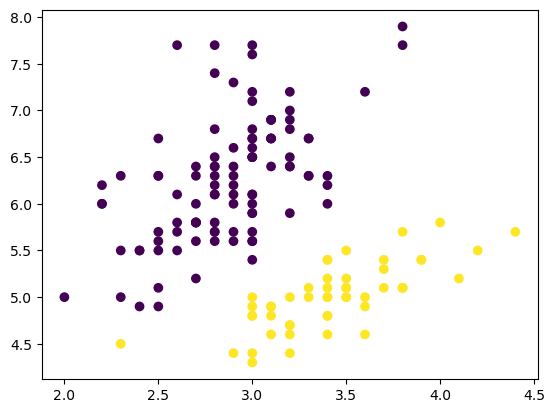

In [61]:
# plot
fig, ax = plt.subplots()
ax.scatter(X[:,1], X[:,0],c=y)
plt.show()

In [62]:
perceptron = PerceptronSimple(0.001, 100)

perceptron.fit(X_train, y_train)

pred = perceptron.predict(X_test)

accuracy_score(pred, y_test)

0.96

In [63]:
perceptron.reporte()

(array([-0.0396,  0.0663]), 0.028000000000000018)

In [64]:
report = classification_report(pred, y_test, digits=2)
print(report)

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        43
         1.0       1.00      0.91      0.95        32

    accuracy                           0.96        75
   macro avg       0.97      0.95      0.96        75
weighted avg       0.96      0.96      0.96        75



In [65]:
sk_perceptron = Perceptron()
sk_perceptron.fit(X_train, y_train)
sk_perceptron_pred = sk_perceptron.predict(X_test)

# Accuracy

accuracy_score(sk_perceptron_pred, y_test)


0.88

In [66]:
report = classification_report(sk_perceptron_pred, y_test, digits=2)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        55
           1       0.69      1.00      0.82        20

    accuracy                           0.88        75
   macro avg       0.84      0.92      0.86        75
weighted avg       0.92      0.88      0.89        75

